##### Chapter5-Rating Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
#sns.set()

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.utils import resample  ### Sequence of resampled copies -- bootstrapping. The original arrays are not impacted.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_selection import SelectFromModel ### includes setting threshold for selecting importance features

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_ratios = pd.read_csv('corporate_rating2.csv')
df_ratios

,Rating,Class,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,1,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,1,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,1,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,0,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [3]:
# Display the structure
df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Class                               2029 non-null   int64  
 2   Name                                2029 non-null   object 
 3   Symbol                              2029 non-null   object 
 4   Rating Agency Name                  2029 non-null   object 
 5   Date                                2029 non-null   object 
 6   Sector                              2029 non-null   object 
 7   currentRatio                        2029 non-null   float64
 8   quickRatio                          2029 non-null   float64
 9   cashRatio                           2029 non-null   float64
 10  daysOfSalesOutstanding              2029 non-null   float64
 11  netProfitMargin                     2029 no

In [4]:
df_ratios_1=df_ratios.iloc[:,7:32]
df_ratios_1.shape

(2029, 25)

In [5]:
print(df_ratios.isnull().sum())

Rating                                0
Class                                 0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0


In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_ratios_1)
df_ratios_1 = scaler.transform(df_ratios_1)
df_ratios_1=pd.DataFrame(df_ratios_1,columns=['currentRatio','quickRatio','cashRatio','daysOfSalesOutstanding',
                                              'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
                                              'operatingProfitMargin','returnOnAssets','returnOnCapital','returnOnEquity',
                                              'assetTurnover','fixedAssetTurnover','debtEquityRatio','debtRatio',
                                              'effectiveTaxRate','freeCashFlowOperatingCashFlowRatio','freeCashFlowPerShare',
                                              'cashPerShare','companyEquityMultiplier','ebitPerRevenue',
                                              'enterpriseValueMultiple','operatingCashFlowPerShare',
                                              'operatingCashFlowSalesRatio','payablesTurnover'])

In [7]:
print(df_ratios_1)

      currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0        -0.058665   -0.067633  -0.158433               -0.065125   
1        -0.056675   -0.065451  -0.129566               -0.066297   
2        -0.058261   -0.066870  -0.152179               -0.063632   
3        -0.056986   -0.065082  -0.137103               -0.065809   
4        -0.058394   -0.065536  -0.146734               -0.064324   
...            ...         ...        ...                     ...   
2024      0.186827    0.135444   1.783407               -0.074822   
2025     -0.012870   -0.041268  -0.066739               -0.068183   
2026     -0.060074   -0.054997  -0.120995               -0.041872   
2027     -0.059442   -0.057857  -0.099558               -0.045460   
2028     -0.055507   -0.049416  -0.129463               -0.040959   

      netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0           -0.039746           -0.042541          -0.611864   
1           -0.038661           -0.042596  

In [8]:
df_ratios_1.shape

(2029, 25)

In [9]:
df_ratios_new = df_ratios_1.copy()

In [10]:
df_ratios_new.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapital,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2029.000000,2.029000e+03,2029.000000,...,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03
mean,3.501936e-18,2.101161e-17,3.501936e-18,1.750968e-17,7.003871e-18,-3.501936e-18,-1.050581e-17,0.000000,-3.501936e-18,0.000000,...,-5.252903e-18,5.252903e-18,-3.501936e-18,-7.879355e-18,7.879355e-18,3.501936e-18,-1.400774e-17,-3.501936e-18,3.501936e-18,1.050581e-17
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247,1.000247e+00,1.000247,...,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-1.013047e-01,-1.380604e-01,-2.400463e-01,-2.576360e-01,-1.684485e+01,-1.389050e+01,-2.913071e+01,-11.132823,-3.445937e+01,-37.063590,...,-9.535892e+00,-3.196519e+01,-6.813386e-02,-3.470382e-02,-2.924001e+01,-1.389222e+01,-7.180135e+00,-1.040403e-01,-3.033854e-01,-1.511270e-01
25%,-5.580366e-02,-6.227586e-02,-1.497977e-01,-6.991420e-02,-4.246349e-02,-4.517926e-02,-5.042888e-01,-0.048362,3.219624e-02,0.031494,...,-2.366948e-02,-3.637732e-02,-3.468360e-02,-3.453453e-02,-1.459012e-02,-4.557919e-02,-7.949117e-02,-3.669469e-02,-7.052741e-02,-4.717949e-02
50%,-4.623523e-02,-5.065194e-02,-1.032278e-01,-6.553594e-02,-3.524772e-02,-3.857584e-02,-1.584108e-01,-0.042723,3.221891e-02,0.031514,...,-9.160546e-03,6.190906e-02,-3.467189e-02,-3.451720e-02,-7.669242e-03,-3.898110e-02,-7.375129e-02,-3.668344e-02,-6.749002e-02,-4.249564e-02
75%,-3.094164e-02,-3.643858e-02,-1.184972e-02,-6.172428e-02,-2.699157e-02,-3.191896e-02,6.697262e-01,-0.036638,3.224623e-02,0.031540,...,-2.541366e-03,1.126053e-01,-3.465760e-02,-3.448124e-02,3.825382e-03,-3.207476e-02,-6.687522e-02,-3.666672e-02,-6.195345e-02,-3.759121e-02
max,3.909892e+01,3.451736e+01,3.495617e+01,2.600281e+01,3.269854e+01,3.442852e+01,4.197755e+00,36.499747,3.259821e-02,0.032521,...,4.055041e+01,9.006472e+00,3.913609e+01,3.908298e+01,2.924921e+01,3.443047e+01,2.099350e+01,3.624388e+01,3.527372e+01,2.672453e+01


- Let's create scatter plots to see if we can observe how labels can be observed in respect to different variables.

### Split the dataset: Creating a Training Set and a Test Set

- 25% of the data will be used as the test set and 75% of the data would be used to train our logit model.

In [11]:
TT=pd.concat([df_ratios['Class'],df_ratios_new],axis=1)
TT.shape
TT.tail()

,Class,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
2024,1,0.186827,0.135444,1.783407,-0.074822,-0.036575,-0.038419,0.955929,-0.045400,0.032239,...,-0.005105,0.143242,-0.034344,-0.032666,-0.017874,-0.039086,-0.061287,-0.036411,-0.070059,-0.029318
2025,0,-0.012870,-0.041268,-0.066739,-0.068183,-0.073966,-0.077771,-0.569938,-0.074482,0.032017,...,-0.003204,0.050874,-0.034649,-0.034499,-0.019533,-0.078442,-0.100225,-0.036656,-0.068463,-0.030920
2026,0,-0.060074,-0.054997,-0.120995,-0.041872,-0.047159,-0.048010,-0.216267,-0.035814,0.032178,...,3.268359,0.136242,-0.034676,-0.034539,0.008129,-0.019189,-0.073593,-0.036699,-0.059759,-0.047055
2027,0,-0.059442,-0.057857,-0.099558,-0.045460,-0.031518,-0.033485,-0.158141,-0.026830,0.032198,...,-0.006235,0.074628,-0.034681,-0.034535,0.005740,-0.034153,-0.048863,-0.036702,-0.063140,-0.047454
2028,0,-0.055507,-0.049416,-0.129463,-0.040959,-0.084191,-0.083265,-0.192994,-0.033853,0.032148,...,-0.012328,0.182295,-0.034669,-0.034497,0.007035,-0.014969,-0.073128,-0.036695,-0.061352,-0.047628


In [12]:
Train, Test = train_test_split(TT,
                               test_size=0.25,
                               random_state=0)

X_train, y_train = Train.iloc[:,1:26], Train.iloc[:,0] ### choose the 70 features excluding NPM
X_test, y_test = Test.iloc[:,1:26], Test.iloc[:,0]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1521, 25), (1521,), (508, 25), (508,))

## Decision Tree


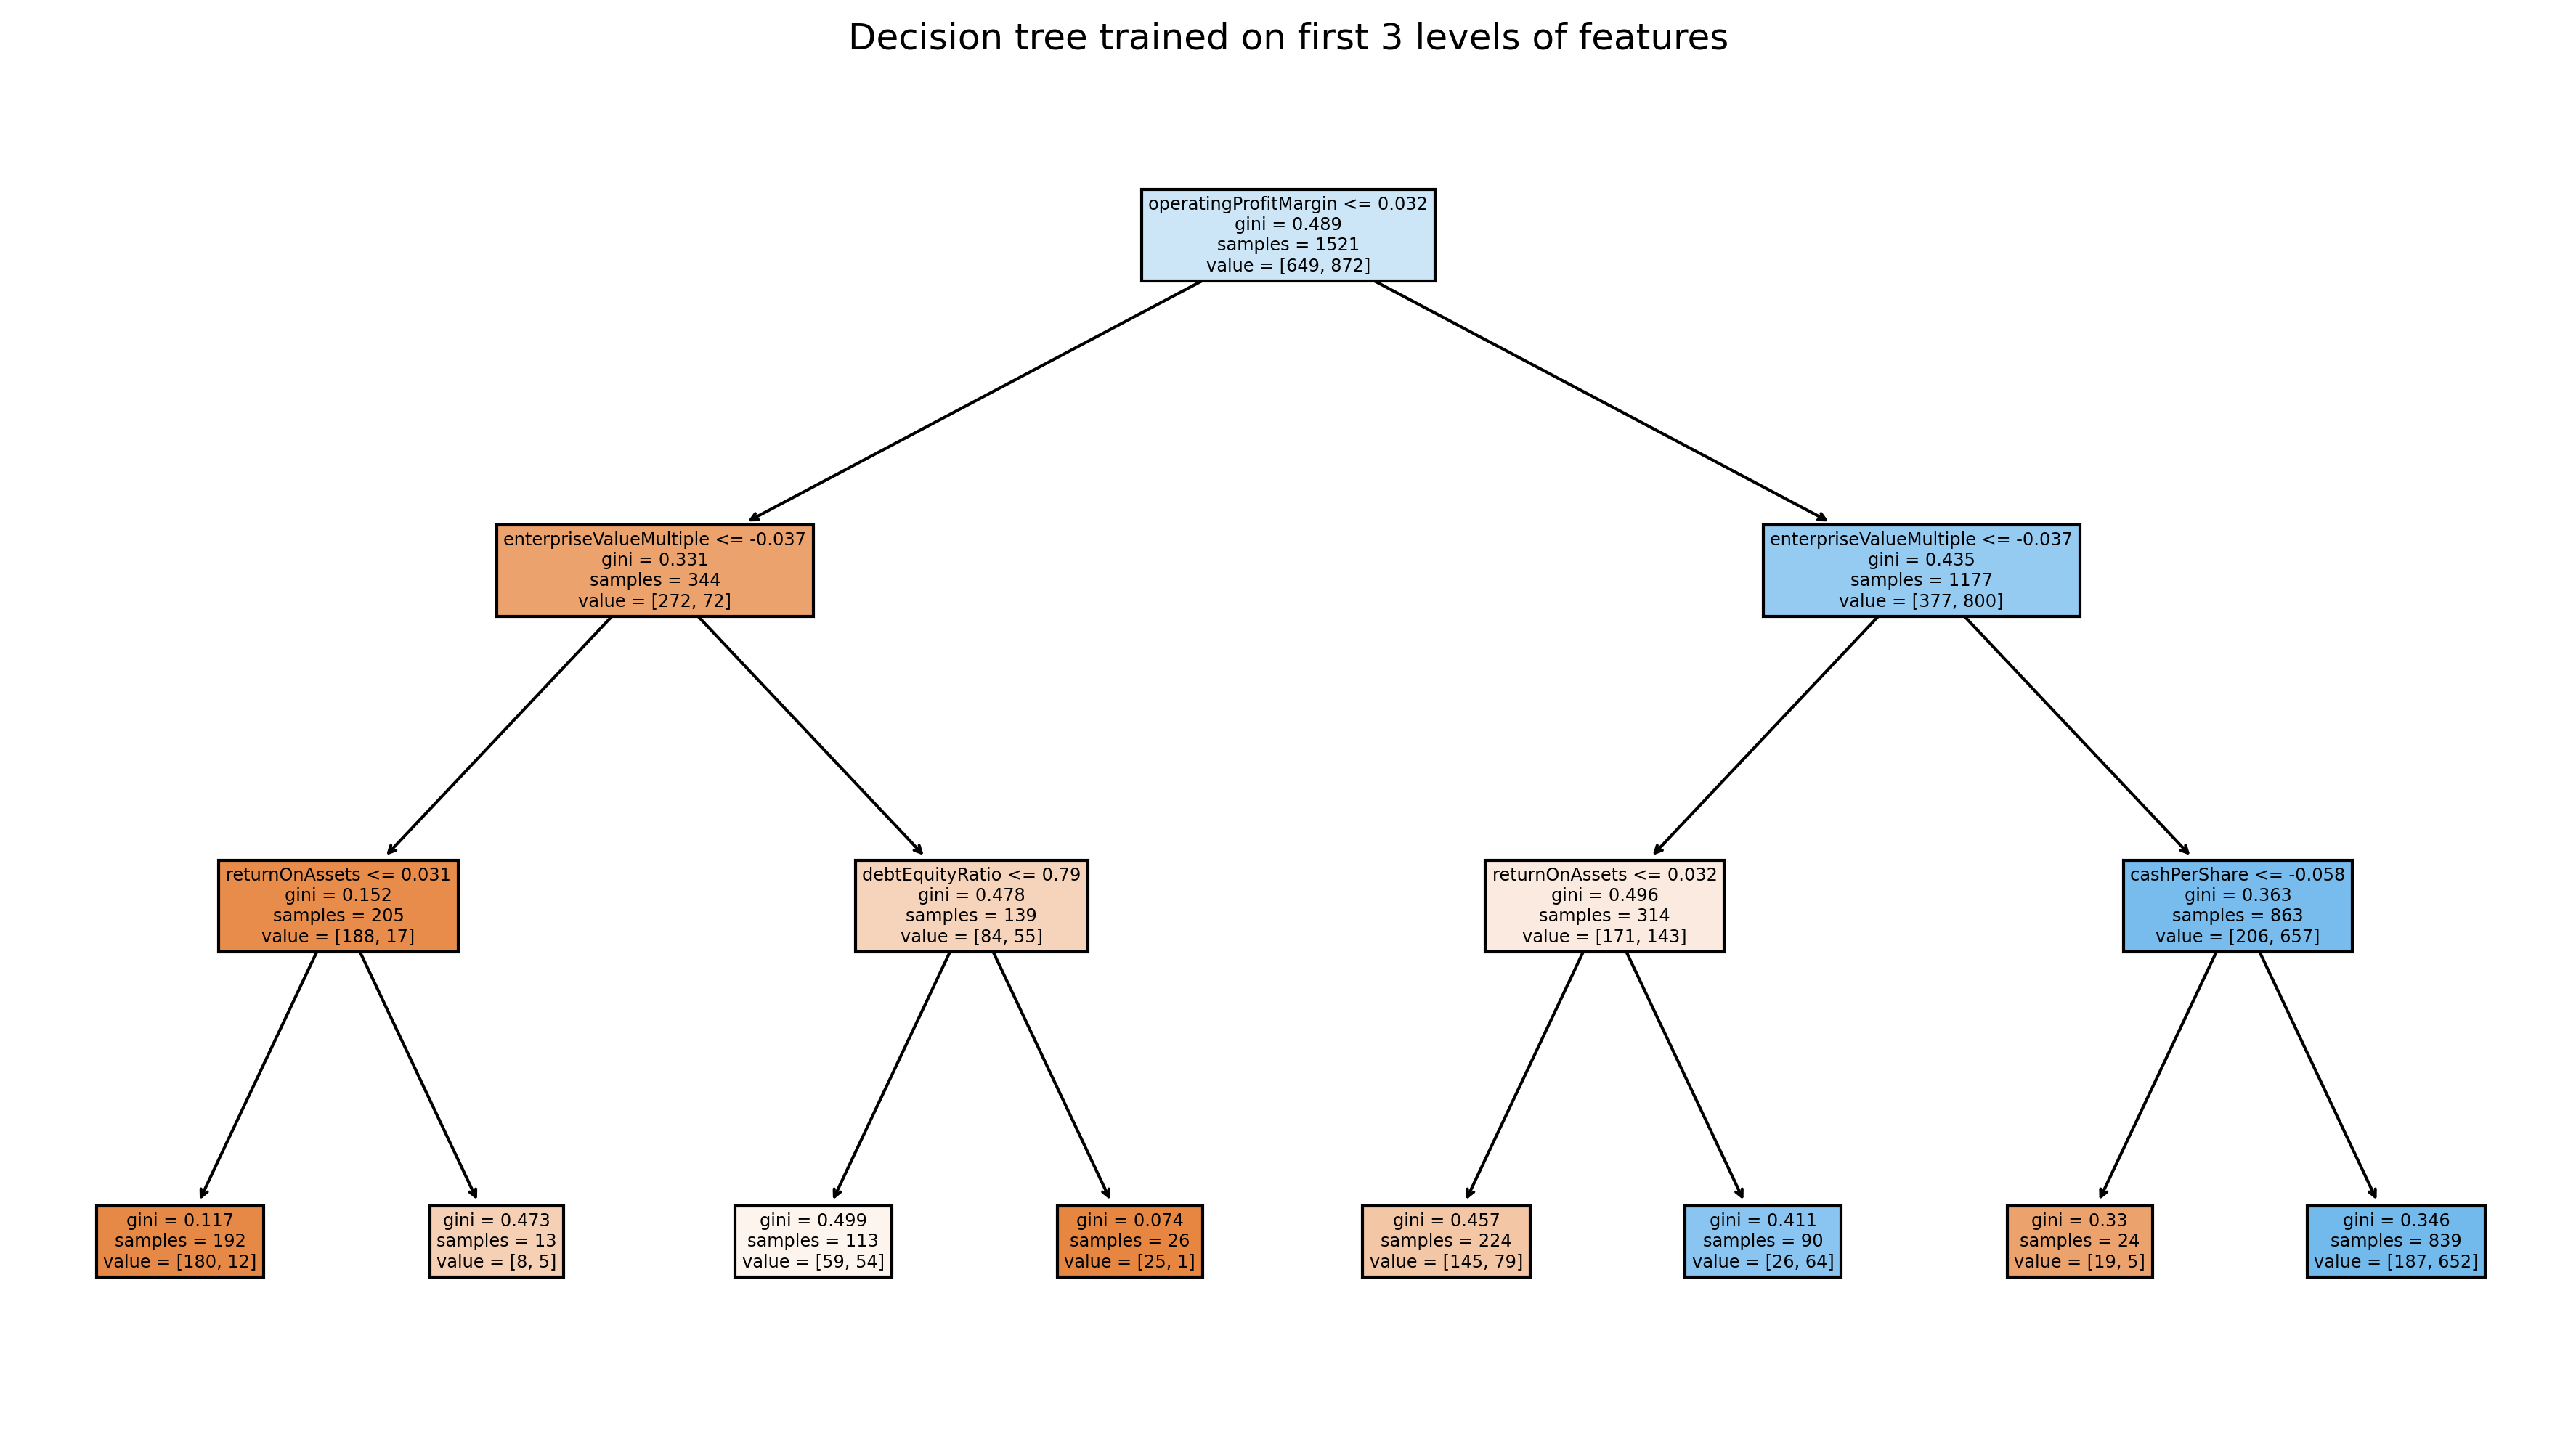

In [14]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt1 = DecisionTreeClassifier(max_depth=3,criterion='gini').fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=300)
plot_tree(dt1,feature_names=TT.columns[:], filled=True)
plt.title("Decision tree trained on first 3 levels of features")
plt.show()

In [15]:
from sklearn.tree import export_text
text_representation = export_text(dt1)
print(text_representation)

|--- feature_8 <= 0.03
|   |--- feature_22 <= -0.04
|   |   |--- feature_9 <= 0.03
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.03
|   |   |   |--- class: 0
|   |--- feature_22 >  -0.04
|   |   |--- feature_14 <= 0.79
|   |   |   |--- class: 0
|   |   |--- feature_14 >  0.79
|   |   |   |--- class: 0
|--- feature_8 >  0.03
|   |--- feature_22 <= -0.04
|   |   |--- feature_9 <= 0.03
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.03
|   |   |   |--- class: 1
|   |--- feature_22 >  -0.04
|   |   |--- feature_19 <= -0.06
|   |   |   |--- class: 0
|   |   |--- feature_19 >  -0.06
|   |   |   |--- class: 1



In [16]:
print(dt1.tree_.max_depth)

3


In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_model= DecisionTreeClassifier(criterion='gini') 
### note list of default parameters:
###   max_depth = none, nodes expanded till all leaves are pure or contain < min_samples_split_samples = 2 by default
###   max_features = none (default) means max_features = n_features (all). When max_features < n_features, the algorithm 
###       will select max_features at random at each split before finding the best split among them
###   min_impurity_decrease = 0 (default case) -- means a node will be split if it induces impurity decrease >= this value

DT_model.fit(X_train, y_train)

y_pred_DT = DT_model.predict(X_test)
Accuracy_DT = metrics.accuracy_score(y_test, y_pred_DT)
print("DT Accuracy:",Accuracy_DT)

DT Accuracy: 0.7165354330708661


In [18]:
text_representation = export_text(DT_model)
print(text_representation)

|--- feature_8 <= 0.03
|   |--- feature_22 <= -0.04
|   |   |--- feature_9 <= 0.03
|   |   |   |--- feature_1 <= -0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.08
|   |   |   |   |--- feature_14 <= -1.19
|   |   |   |   |   |--- feature_23 <= -0.06
|   |   |   |   |   |   |--- feature_24 <= -0.04
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_24 >  -0.04
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_23 >  -0.06
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  -1.19
|   |   |   |   |   |--- feature_12 <= -0.04
|   |   |   |   |   |   |--- feature_0 <= -0.03
|   |   |   |   |   |   |   |--- feature_0 <= -0.07
|   |   |   |   |   |   |   |   |--- feature_18 <= -0.03
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_18 >  -0.03
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -0.07
|   |   |   

In [19]:
print(DT_model.tree_.max_depth)  ### prints the depth of the unconstrained DT

22


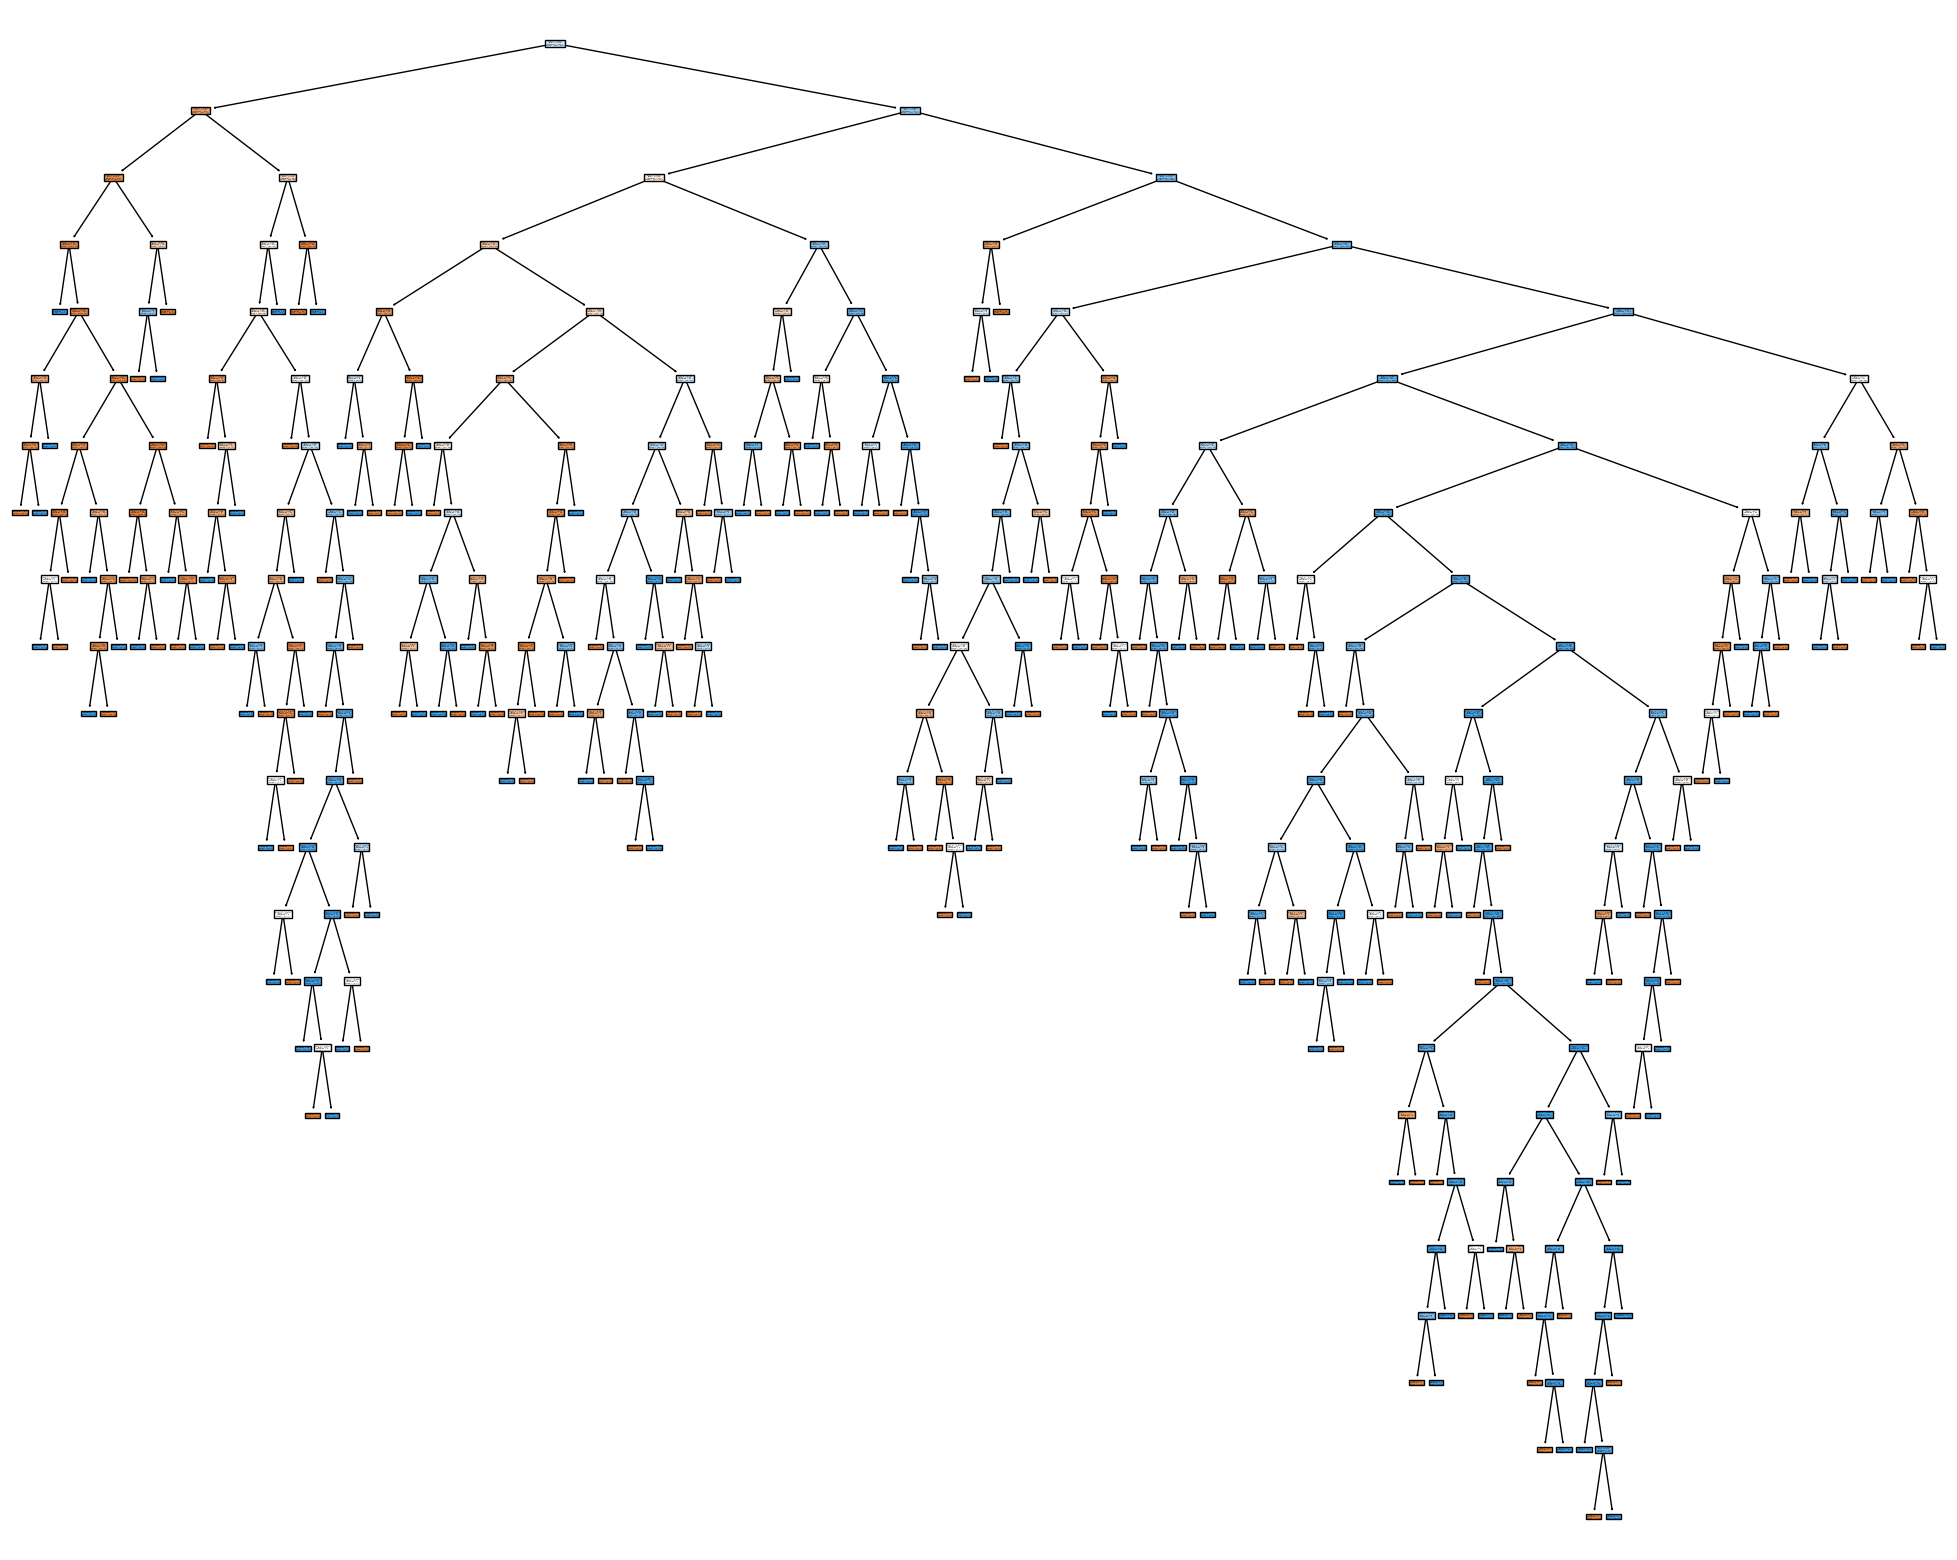

In [20]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_model, filled=True)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix)

[[144  71]
 [ 73 220]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       215
           1       0.76      0.75      0.75       293

    accuracy                           0.72       508
   macro avg       0.71      0.71      0.71       508
weighted avg       0.72      0.72      0.72       508



In [23]:
###       Assuming your target is (0,1), then the classifier would output a probability matrix of dimension (N,2). 
###       The first index refers to the probability that the data belong to class 0, and the second refers to the probability 
###           hat the data belong to class 1. Each row sums to 1.
### "RF_model.predict_proba(X_test)[:,1]" will print a single array of 508 numbers - the second column or the predicted prob 
###    of test cases being 1.
### "RF_model.predict_proba(X_test)" will print array([[0.242, 0.758], [0.134, 0.866], ..... for 508 pairs

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_DT = DT_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_DT)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_DT = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_DT

0.7103103420906421

In [25]:
print(preds_DT)

[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.

In [26]:
DT_model.predict_proba(X_test)[:,1]

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0.

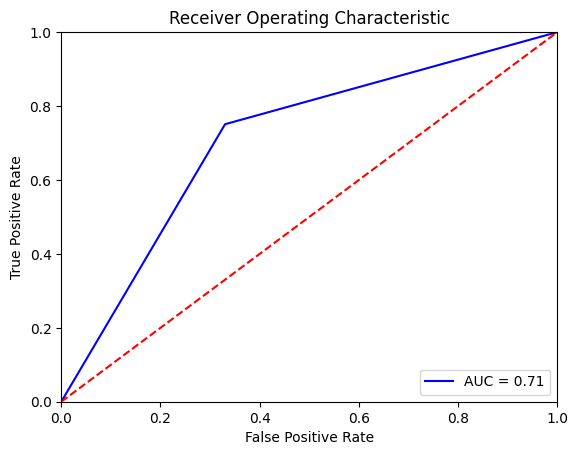

In [27]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()